In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

file_path = 'data.xlsx'
df = pd.read_excel(file_path, sheet_name='Next_Generation_Simulation__NGS')

In [2]:
df_clean = df[df['v_Class'] == 2].copy()  # choose auto type
df_clean = df_clean[df_clean['Direction'] == 2].copy()  # direction
df_clean = df_clean[df_clean['Lane_ID'].between(1, 5)].copy()  # Lane 1 to 5
df_clean = df_clean[df_clean['Local_X']>0].copy() # incorrect record
df_clean = df_clean.dropna()
df_clean

,Vehicle_ID,Frame_ID,Total_Frames,Global_Time,Local_X,Local_Y,Global_X,Global_Y,v_length,v_Width,...,D_Zone,Int_ID,Section_ID,Direction,Movement,Preceding,Following,Space_Headway,Time_Headway,Location
25,204,1029,160,1118935782800,36.966,241.560,6452033.953,1873008.280,13.5,6.5,...,203.0,0.0,2.0,2.0,1.0,162,0,64.15,1.46,lankershim
29,1023,7458,885,1118936425700,18.406,352.808,6452062.658,1873113.282,17.9,6.5,...,208.0,2.0,0.0,2.0,1.0,984,0,1136.46,9999.99,lankershim
33,1421,10335,927,1118936713400,29.061,296.360,6452049.030,1873059.966,14.4,7.0,...,208.0,0.0,2.0,2.0,1.0,1417,0,22.39,10.36,lankershim
35,1315,7636,827,1118937463500,27.648,235.151,6452025.557,1873012.313,11.9,6.2,...,208.0,0.0,2.0,2.0,1.0,1306,1305,29.17,9999.99,lankershim
38,1480,9479,554,1163966500,29.304,1564.264,2230863.533,1377042.480,14.7,7.1,...,212.0,0.0,4.0,2.0,1.0,1444,1422,140.62,7.03,peachtree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048541,970,6261,1376,1118937326000,38.692,972.535,6452343.843,1873673.333,12.8,6.4,...,208.0,0.0,3.0,2.0,1.0,986,1030,27.80,77.21,lankershim
1048557,1431,8544,1015,1163884700,17.157,1501.155,2230851.055,1376961.860,15.9,7.4,...,214.0,0.0,4.0,2.0,1.0,1369,1387,259.27,5.05,peachtree
1048567,1324,10398,1055,1118936719700,63.196,1493.319,6452497.931,1874174.600,16.0,7.0,...,208.0,4.0,0.0,2.0,1.0,0,1346,0.00,0.00,lankershim
1048569,547,3673,1105,1118936047200,37.351,227.972,6452029.174,1872995.644,16.0,7.0,...,208.0,0.0,2.0,2.0,1.0,542,548,23.63,69.51,lankershim


In [3]:
# missing value
missing_values = df_clean[['v_Vel' , 'v_Acc', 'Space_Headway', 'Time_Headway', 'Preceding', 'Following']].isnull().sum()
print("\nMissing values in key features:\n", missing_values)


Missing values in key features:
 v_Vel            0
v_Acc            0
Space_Headway    0
Time_Headway     0
Preceding        0
Following        0
dtype: int64


In [4]:
# Statistical summary of numerical features
desc_stats = df_clean[['Local_X', 'v_Vel', 'v_Acc', 'Lane_ID', 'Space_Headway']].describe()
desc_stats

,Local_X,v_Vel,v_Acc,Lane_ID,Space_Headway
count,102261.000000,102261.000000,102261.000000,102261.000000,102261.000000
mean,25.598544,15.897551,0.066030,2.100195,76.614542
std,12.648270,17.909044,5.288734,0.964921,149.419588
min,0.075000,0.000000,-15.840000,1.000000,0.000000
25%,15.920000,0.000000,-0.060000,1.000000,19.050000
50%,25.160000,6.450000,0.000000,2.000000,29.570000
75%,34.600000,31.470000,0.120000,3.000000,69.090000
max,92.772000,55.670000,15.840000,4.000000,1804.120000


EDA

D:\ANACOND\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


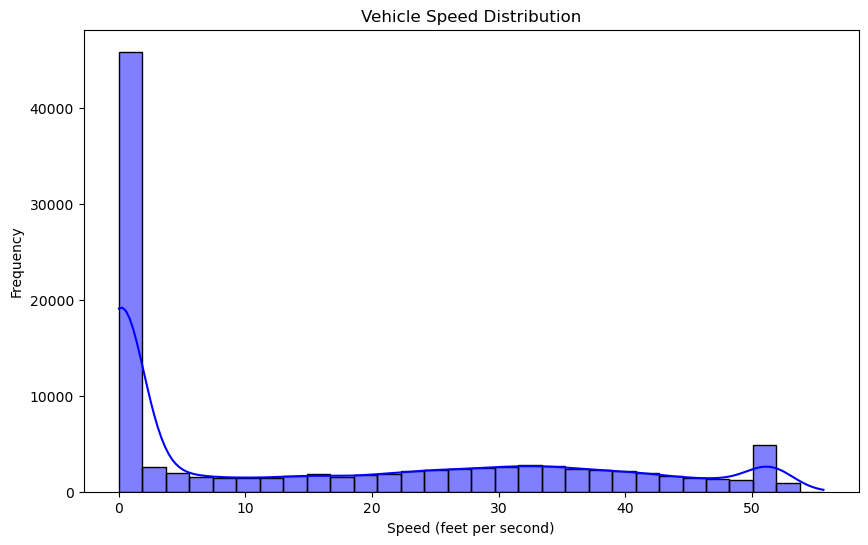

In [6]:
#vehicle speed
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['v_Vel'], kde=True, color='blue', bins=30)
plt.title('Vehicle Speed Distribution')
plt.xlabel('Speed (feet per second)')
plt.ylabel('Frequency')
plt.show()

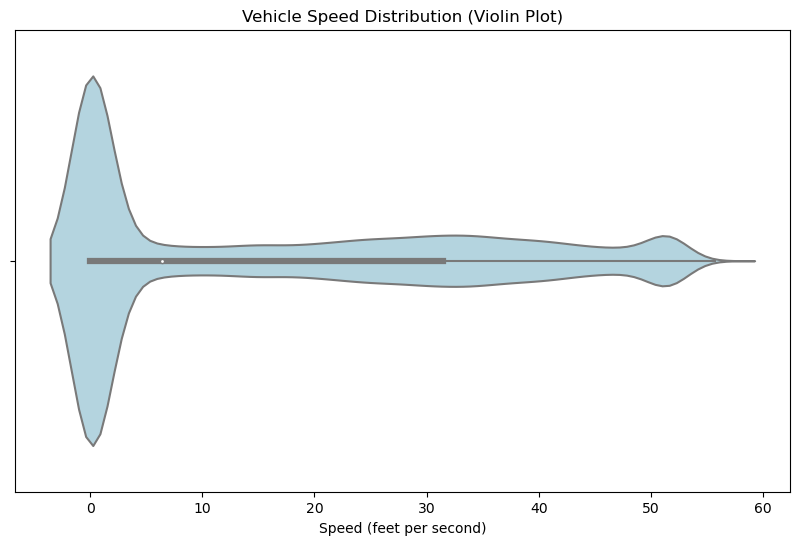

In [7]:
#vehicle speed violin
plt.figure(figsize=(10, 6))
sns.violinplot(x=df_clean['v_Vel'], color='lightblue')
plt.title('Vehicle Speed Distribution (Violin Plot)')
plt.xlabel('Speed (feet per second)')
plt.show()


D:\ANACOND\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


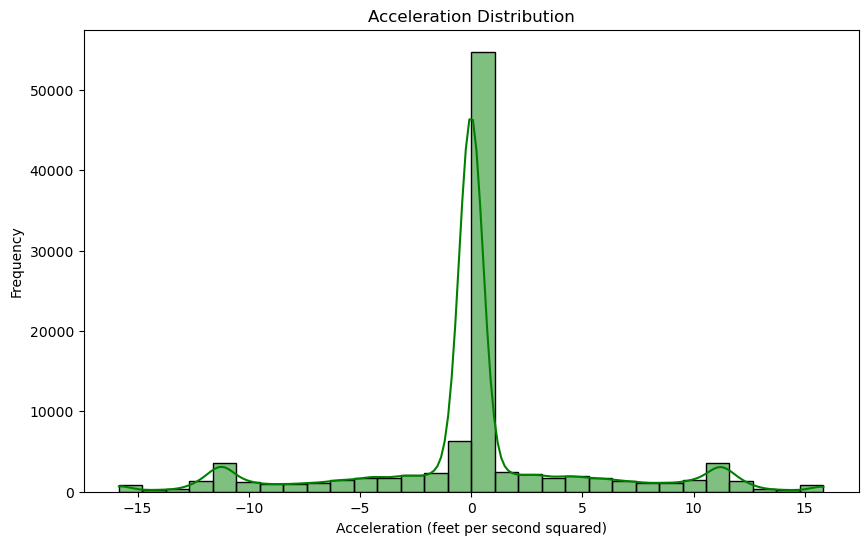

In [8]:
#Acc Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['v_Acc'], kde=True, color='green', bins=30)
plt.title('Acceleration Distribution')
plt.xlabel('Acceleration (feet per second squared)')
plt.ylabel('Frequency')
plt.show()

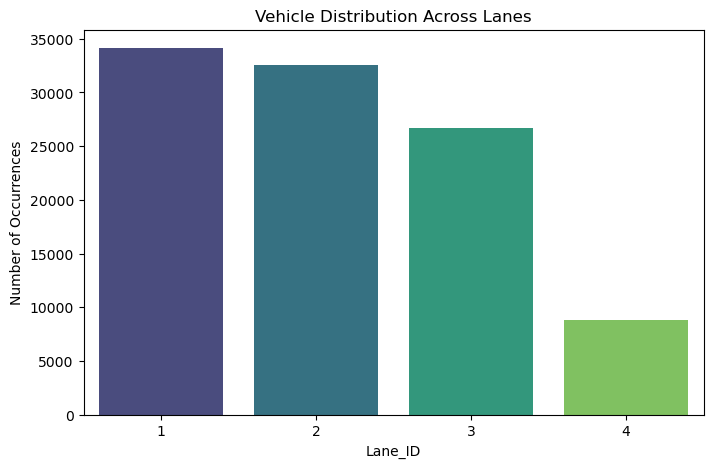

In [9]:
# Vehicles Across Lanes
lane_counts = df_clean['Lane_ID'].value_counts().sort_index()
plt.figure(figsize=(8, 5))
sns.barplot(x=lane_counts.index, y=lane_counts.values, palette='viridis')
plt.title('Vehicle Distribution Across Lanes', fontsize=12)
plt.xlabel('Lane_ID')
plt.ylabel('Number of Occurrences')

plt.show()

D:\ANACOND\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


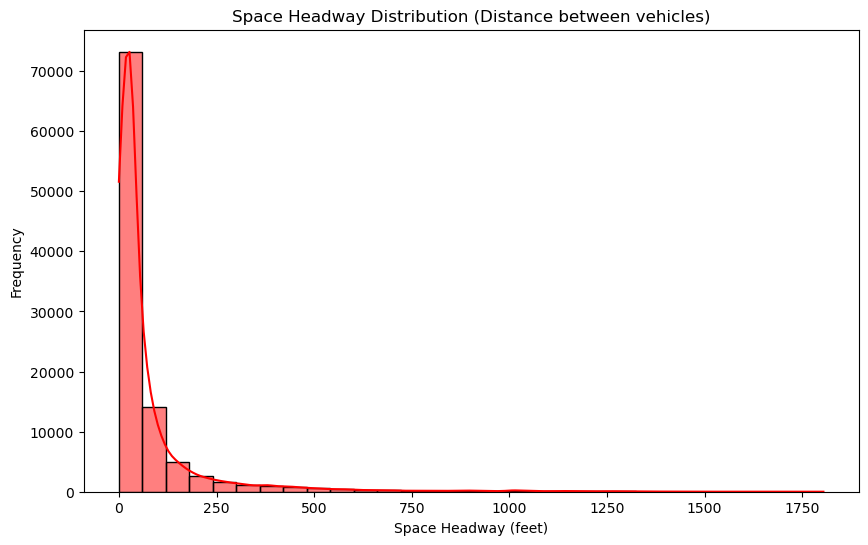

In [10]:
# Space Headway
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['Space_Headway'], kde=True, color='red', bins=30)
plt.title('Space Headway Distribution (Distance between vehicles)')
plt.xlabel('Space Headway (feet)')
plt.ylabel('Frequency')
plt.show()

In [11]:
# Calculate the lateral position
df_clean['Lane_Center'] = (df_clean['Lane_ID'] - 1) * 12
# lateral deviation
df_clean['lateral_deviation'] = df_clean['Local_X'] - df_clean['Lane_Center']
# Group according to Vehicle_ID and calculate std of lateral deviation
lateral_std = df_clean.groupby('Vehicle_ID')['lateral_deviation'].std().reset_index(name='lateral_std')
lateral_std


,Vehicle_ID,lateral_std
0,2,5.648503
1,4,5.977794
2,5,5.383783
3,9,4.167950
4,10,3.840059
...,...,...
1023,1640,5.710791
1024,1689,3.214835
1025,1708,5.770127
1026,1727,NaN


In [12]:
#  Calculate the maximum lane lateral deviation
max_lateral_offset = df_clean.groupby('Vehicle_ID')['lateral_deviation'].agg(
    max_offset=lambda x: x.max() - x.min()
).reset_index()
# Rename
max_lateral_offset = max_lateral_offset.rename(columns={'max_offset': 'max_lateral_offset'})
max_lateral_offset

,Vehicle_ID,max_lateral_offset
0,2,28.263
1,4,26.032
2,5,42.378
3,9,27.859
4,10,22.606
...,...,...
1023,1640,19.284
1024,1689,16.985
1025,1708,19.003
1026,1727,0.000


In [13]:
#Calculate var of acceleration and Rename
acc_var = df_clean.groupby('Vehicle_ID')['v_Acc'].var().reset_index()
acc_var.rename(columns={'v_Acc': 'Acc_var'}, inplace=True)
acc_var

,Vehicle_ID,Acc_var
0,2,20.624751
1,4,70.598825
2,5,29.450296
3,9,30.552236
4,10,26.641611
...,...,...
1023,1640,22.676692
1024,1689,10.396323
1025,1708,19.690071
1026,1727,NaN


In [14]:
# Calculate the frequency of sudden braking for each vehicle
#  < -8.2 ft/s²
hard_brake = df_clean.groupby('Vehicle_ID').agg(
    total_frames=('v_Acc', 'count'),
    hard_brake_count=('v_Acc', lambda x: sum(x < -8.2))
).reset_index()  
#  Frequency
hard_brake['hard_brake_freq'] = hard_brake['hard_brake_count'] / hard_brake['total_frames']
hard_brake = hard_brake[['Vehicle_ID', 'hard_brake_freq']]
hard_brake

,Vehicle_ID,hard_brake_freq
0,2,0.073276
1,4,0.153846
2,5,0.075472
3,9,0.069307
4,10,0.080000
...,...,...
1023,1640,0.074627
1024,1689,0.036866
1025,1708,0.076923
1026,1727,0.000000


In [15]:
# merge all the features
select_featured_df = lateral_std.merge(
    max_lateral_offset, 
    on='Vehicle_ID', 
    how='outer'  
).merge(
    acc_var, 
    on='Vehicle_ID', 
    how='outer'
).merge(
    hard_brake, 
    on='Vehicle_ID', 
    how='outer'
)
# delete the rows containing missing values
select_featured_df = select_featured_df.dropna(axis=0, how='any')
select_featured_df

,Vehicle_ID,lateral_std,max_lateral_offset,Acc_var,hard_brake_freq
0,2,5.648503,28.263,20.624751,0.073276
1,4,5.977794,26.032,70.598825,0.153846
2,5,5.383783,42.378,29.450296,0.075472
3,9,4.167950,27.859,30.552236,0.069307
4,10,3.840059,22.606,26.641611,0.080000
...,...,...,...,...,...
1021,1597,4.561460,9.867,14.523800,0.000000
1022,1621,5.488222,14.738,23.749503,0.153846
1023,1640,5.710791,19.284,22.676692,0.074627
1024,1689,3.214835,16.985,10.396323,0.036866


D:\ANACOND\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
D:\ANACOND\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
D:\ANACOND\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
D:\ANACOND\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available th

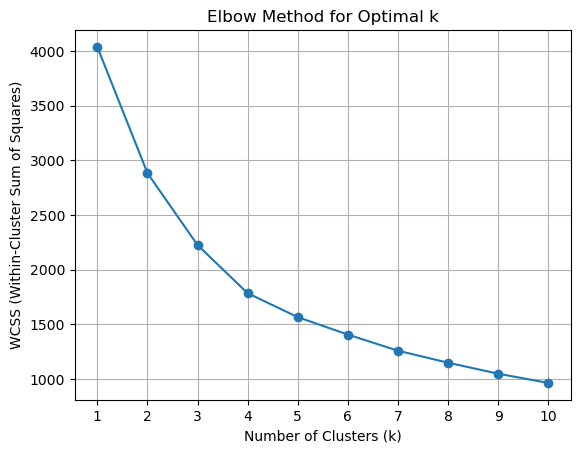

In [16]:
# Determine the optimal number of clusters (K-Means) - the elbow rule
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
features = select_featured_df[['lateral_std', 'max_lateral_offset', 'Acc_var', 'hard_brake_freq']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
wcss = []  
# test 1 to 10 clusters
k_range = range(1, 11) 
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)
# Output
plt.plot(k_range, wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.xticks(k_range)
plt.grid(True)
plt.show()

D:\ANACOND\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


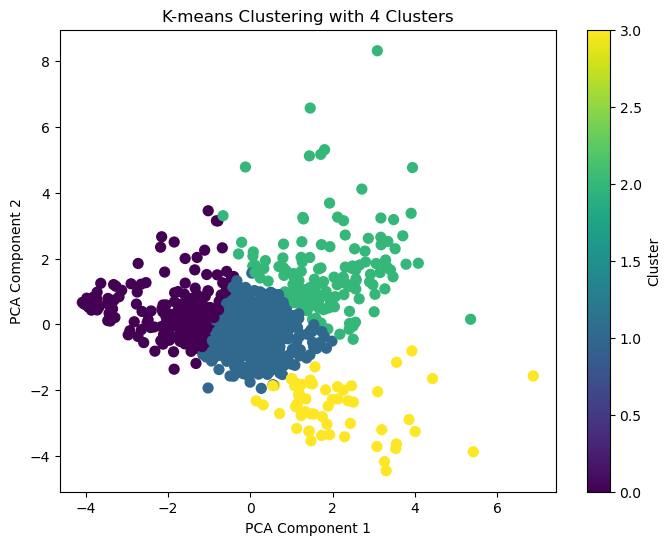

In [17]:
from sklearn.decomposition import PCA
# perform clustering and obtain clustering labels
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
select_featured_df['K_Means_cluster'] = kmeans.fit_predict(scaled_features)
# visualisation through PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaled_features)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=select_featured_df['K_Means_cluster'], cmap='viridis', s=50)
plt.title(f'K-means Clustering with {4} Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

D:\ANACOND\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


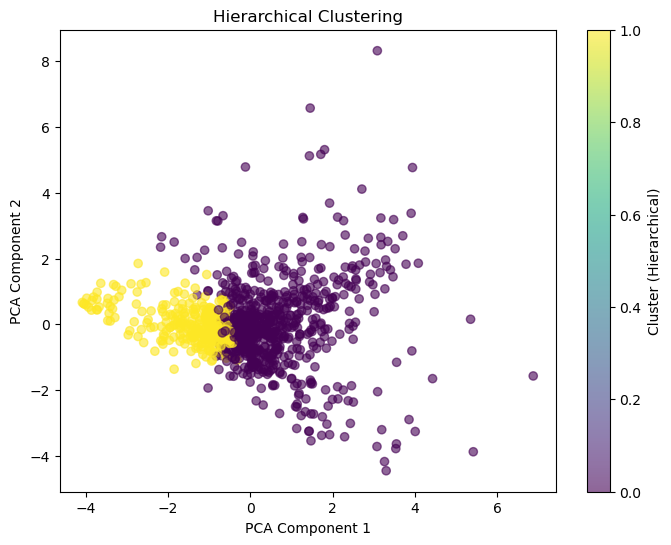

In [18]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
import scipy.cluster.hierarchy as sch
# cluster using hierarchical clustering
hierarchical = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
select_featured_df['hierarchical_cluster'] = hierarchical.fit_predict(scaled_features)
# visualise the results
pca_result_hierarchical = pca.fit_transform(scaled_features)

plt.figure(figsize=(8, 6))
plt.scatter(pca_result_hierarchical[:, 0], pca_result_hierarchical[:, 1], 
            c=select_featured_df['hierarchical_cluster'], cmap='viridis', alpha=0.6)
plt.title('Hierarchical Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster (Hierarchical)')
plt.show()

D:\ANACOND\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


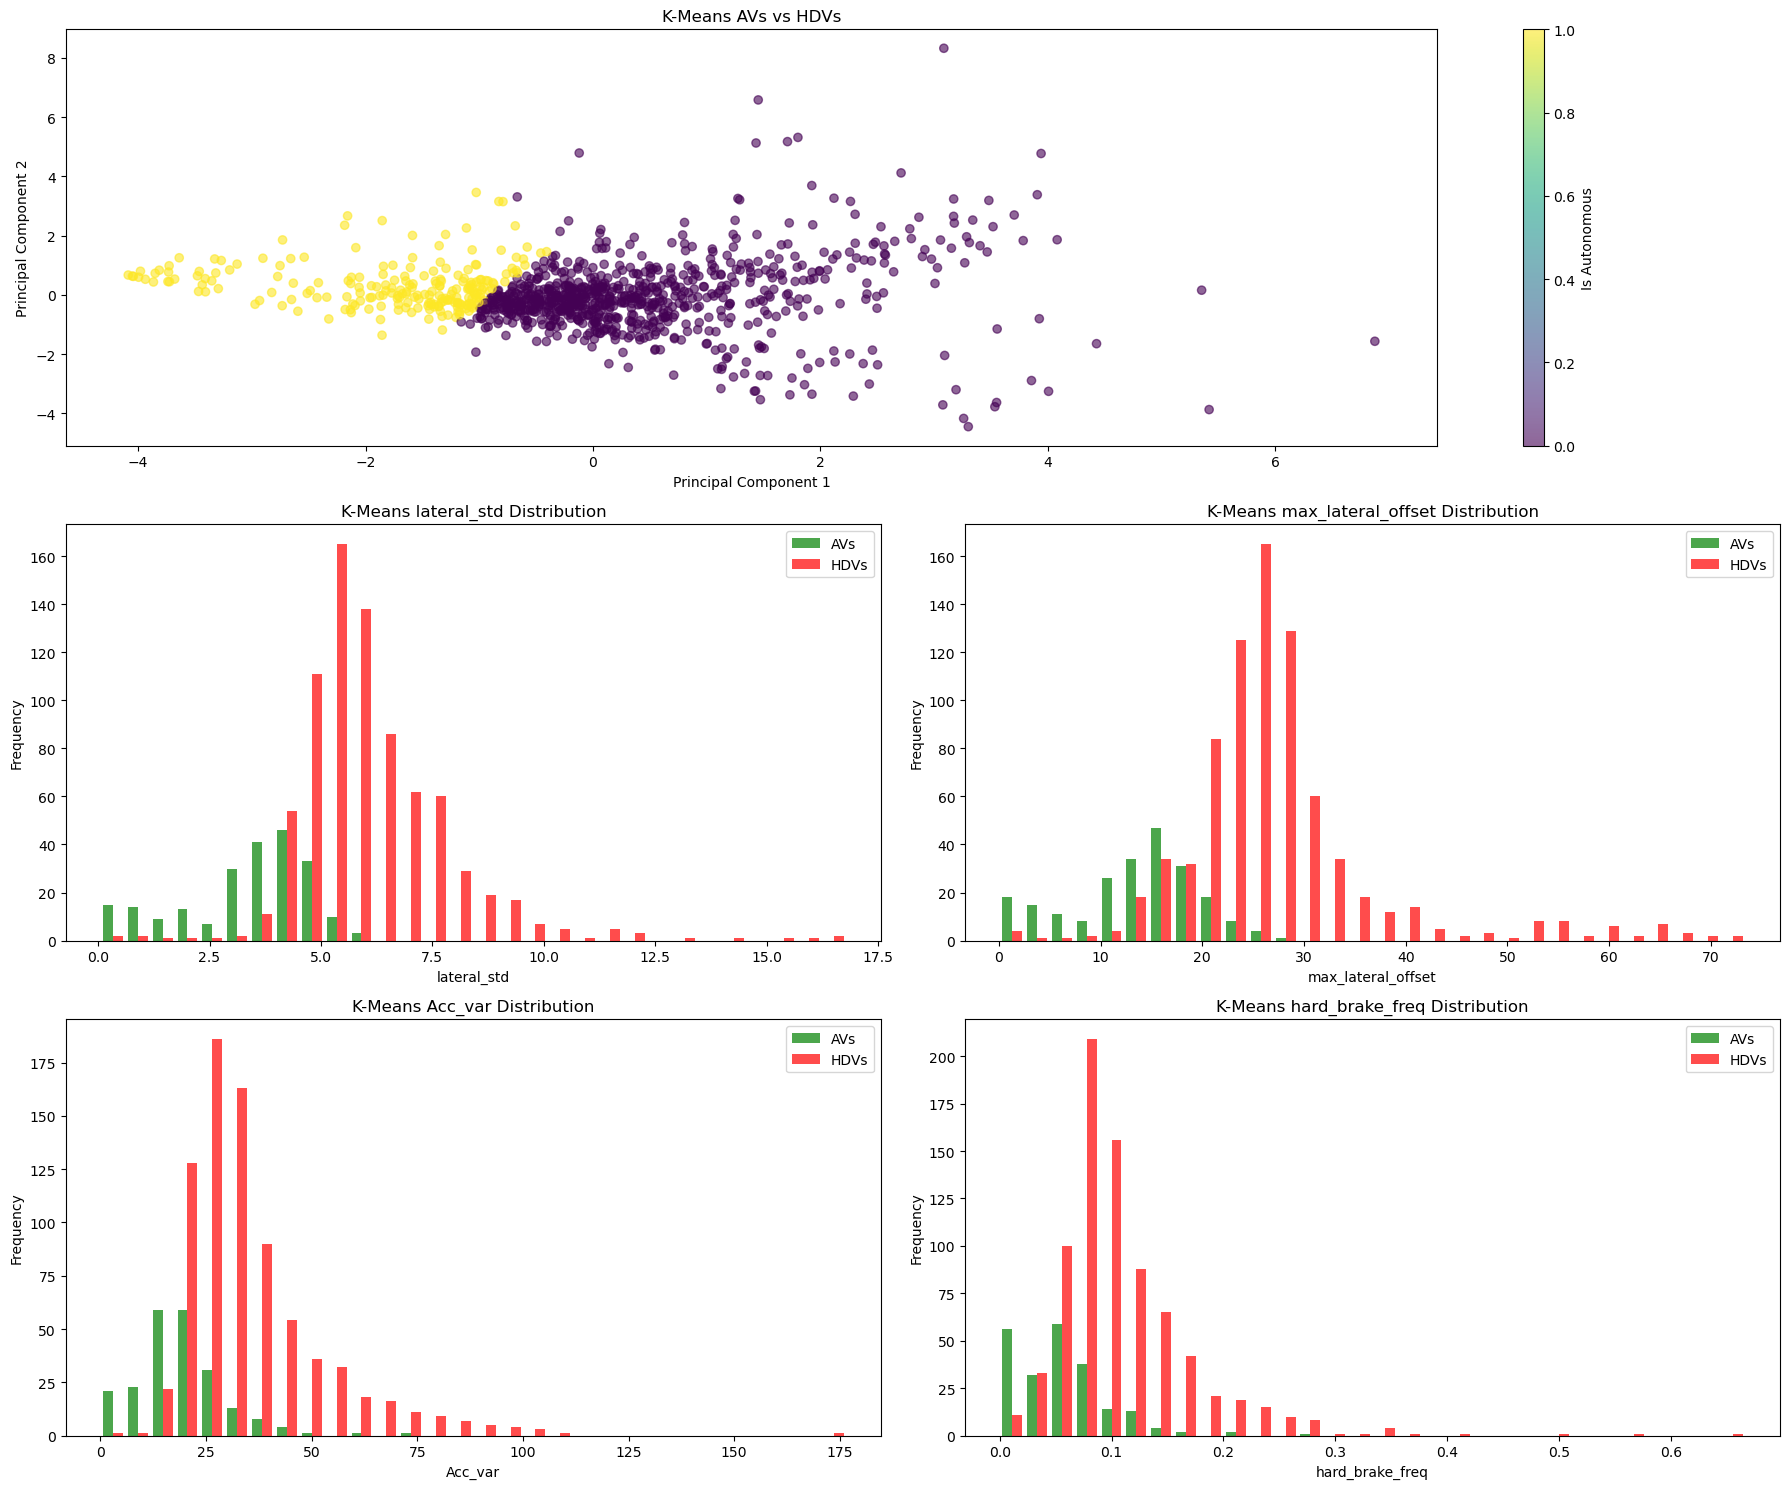

In [19]:

final_kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
select_featured_df['K_Means_cluster'] = final_kmeans.fit_predict(scaled_features)
# identify K-Means autonomous driving clusters 
cluster_means = select_featured_df.groupby('K_Means_cluster')[['lateral_std', 'max_lateral_offset', 'Acc_var', 'hard_brake_freq']].mean()
global_means = features.mean(axis=0)
# identify the clusters where all features are below the global average
autonomous_clusters = cluster_means[
    (cluster_means['lateral_std'] < global_means['lateral_std']) &
    (cluster_means['max_lateral_offset'] < global_means['max_lateral_offset']) &
    (cluster_means['Acc_var'] < global_means['Acc_var']) &
    (cluster_means['hard_brake_freq'] < global_means['hard_brake_freq'])
].index.tolist()
# label the autonomous driving cluster as 1 and the others as 0
select_featured_df['K_Means_Label'] = select_featured_df['K_Means_cluster'].isin(autonomous_clusters).astype(int)

# visualisation
plt.figure(figsize=(18, 15))

plt.subplot(3, 2, (1, 2))  
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

plt.scatter(pca_result[:, 0], pca_result[:, 1], 
            c=select_featured_df['K_Means_Label'], 
            cmap='viridis', alpha=0.6)
plt.title('K-Means AVs vs HDVs')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Is Autonomous')

# characteristic distribution histogram
features_to_plot = ['lateral_std', 'max_lateral_offset', 'Acc_var', 'hard_brake_freq']
positions = [3, 4, 5, 6]  

for i, feature in enumerate(features_to_plot):
    plt.subplot(3, 2, positions[i])
    plt.hist([select_featured_df[select_featured_df['K_Means_Label'] == 1][feature],
             select_featured_df[select_featured_df['K_Means_Label'] == 0][feature]],
             bins=30, stacked=False,
             color=['green', 'red'], alpha=0.7,
             label=['AVs', 'HDVs'])
    plt.title(f'K-Means {feature} Distribution')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()


In [20]:
# K-Means cluster data detail
autonomous_data = select_featured_df[select_featured_df['K_Means_Label']==1]
print(f"The Number of Autonomous Driving Data: {len(autonomous_data)} ({len(autonomous_data)/len(select_featured_df):.2%})")
print("The Average Feature Value of the Autonomous Driving Cluster:")
print(cluster_means.loc[autonomous_clusters])

The Number of Autonomous Driving Data: 221 (21.90%)
The Average Feature Value of the Autonomous Driving Cluster:
                 lateral_std  max_lateral_offset    Acc_var  hard_brake_freq
K_Means_cluster                                                             
0                   3.384379            13.46291  19.164109          0.05397


D:\ANACOND\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


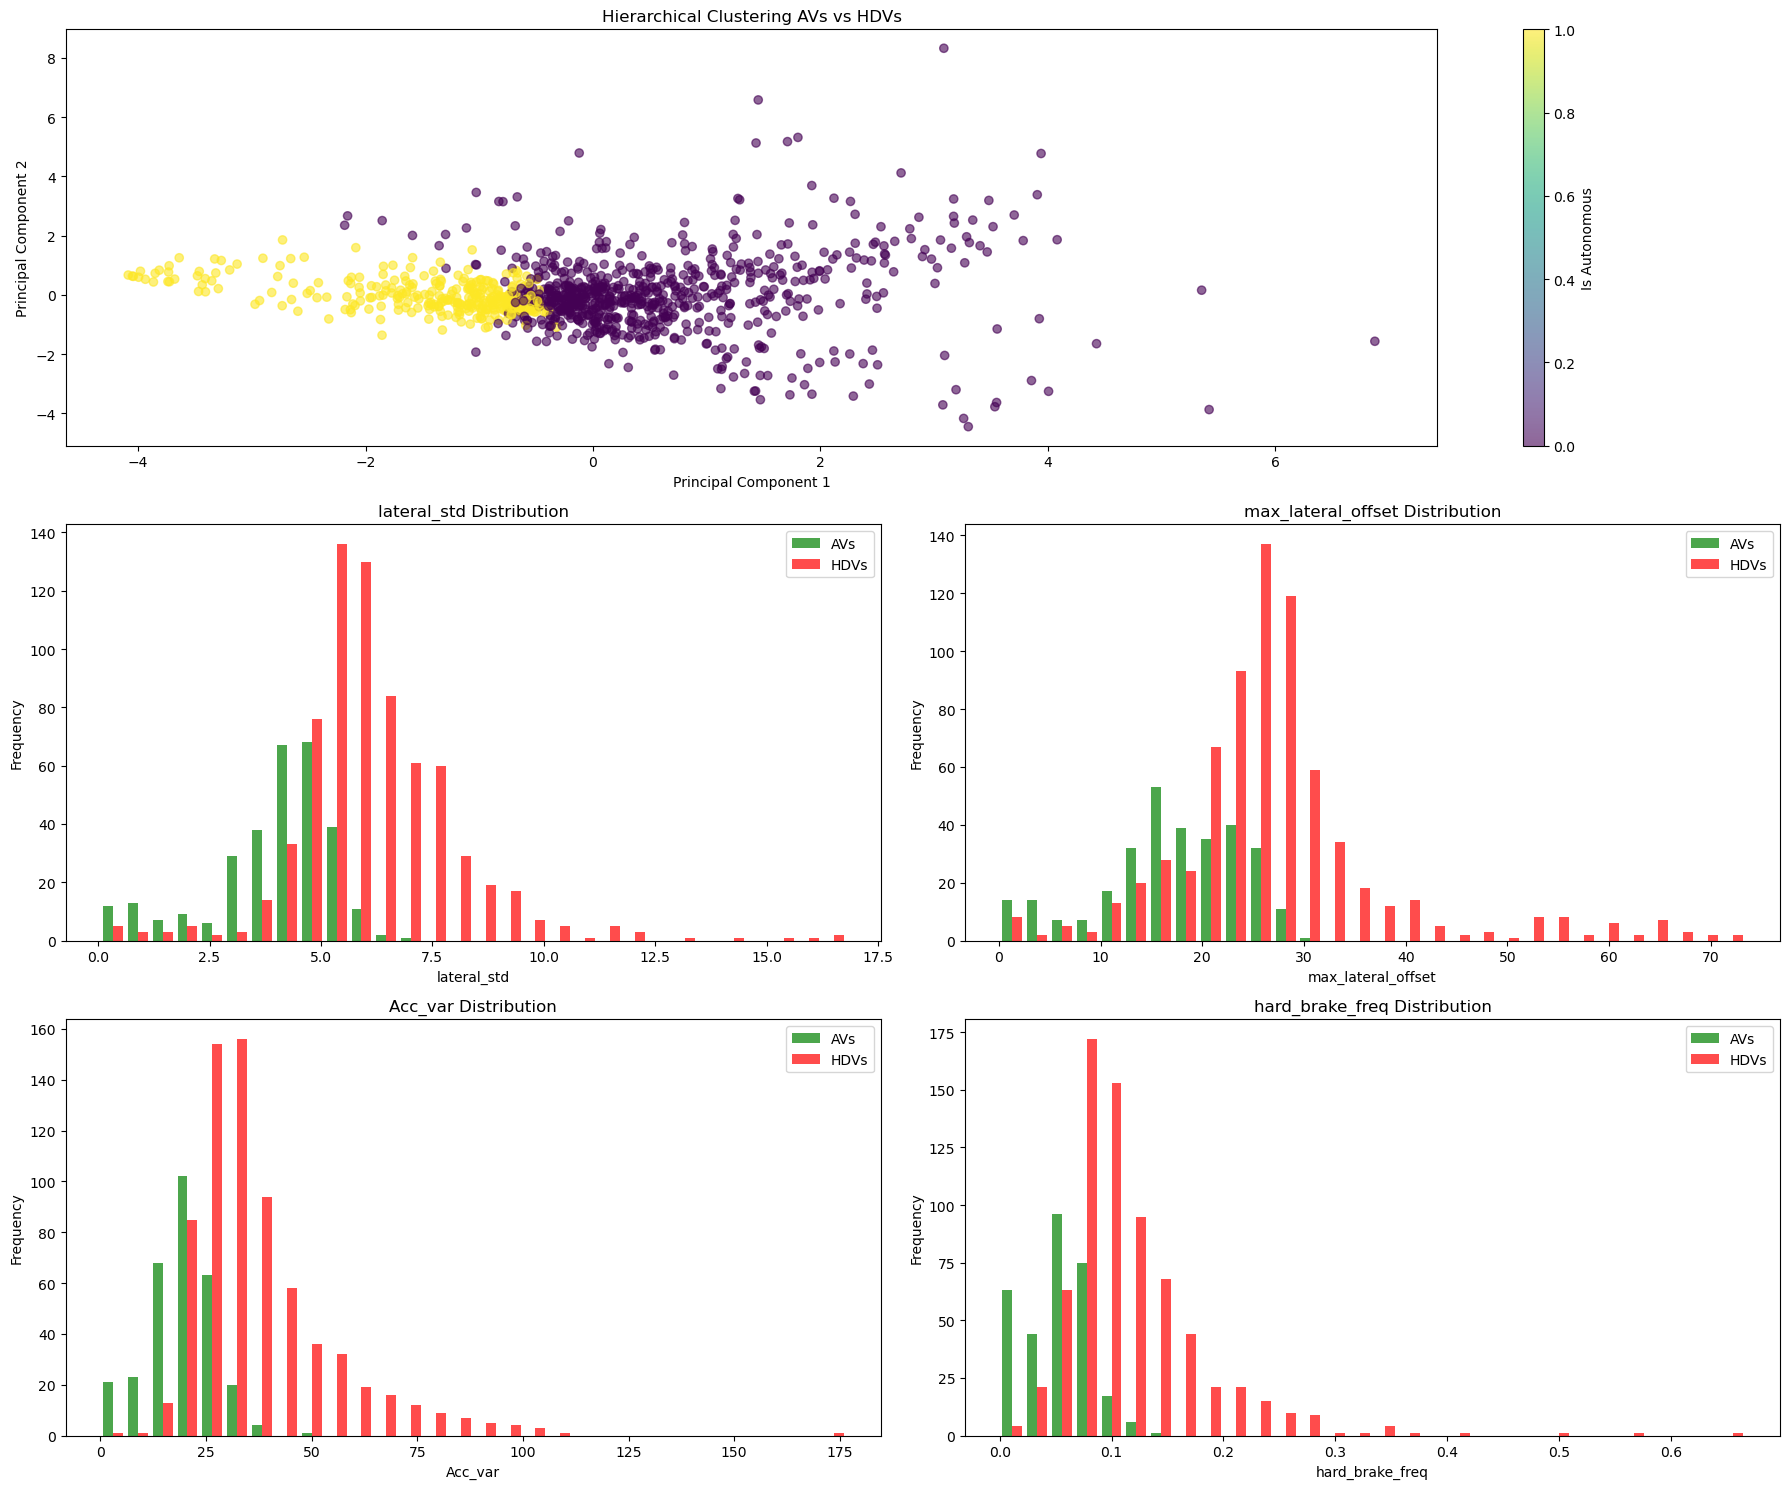

In [21]:
hierarchical = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
select_featured_df['hierarchical_cluster'] = hierarchical.fit_predict(scaled_features)

# Identify Hierachical Clustering autonomous driving clusters
cluster_means = select_featured_df.groupby('hierarchical_cluster')[['lateral_std', 'max_lateral_offset', 'Acc_var', 'hard_brake_freq']].mean()
global_means = features.mean(axis=0)

# Identify the clusters where all features are below the global average
autonomous_clusters = cluster_means[
    (cluster_means['lateral_std'] < global_means['lateral_std']) &
    (cluster_means['max_lateral_offset'] < global_means['max_lateral_offset']) &
    (cluster_means['Acc_var'] < global_means['Acc_var']) &
    (cluster_means['hard_brake_freq'] < global_means['hard_brake_freq'])
].index.tolist()

# label the autonomous driving cluster as 1 and the others as 0
select_featured_df['Hierarchical_Label'] = select_featured_df['hierarchical_cluster'].isin(autonomous_clusters).astype(int)

# visualisation
plt.figure(figsize=(18, 15))

plt.subplot(3, 2, (1, 2))  
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

plt.scatter(pca_result[:, 0], pca_result[:, 1], 
            c=select_featured_df['Hierarchical_Label'], 
            cmap='viridis', alpha=0.6)
plt.title('Hierarchical Clustering AVs vs HDVs')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Is Autonomous')

# characteristic distribution histogram
features_to_plot = ['lateral_std', 'max_lateral_offset', 'Acc_var', 'hard_brake_freq']
positions = [3, 4, 5, 6]  

for i, feature in enumerate(features_to_plot):
    plt.subplot(3, 2, positions[i])
    plt.hist([select_featured_df[select_featured_df['Hierarchical_Label'] == 1][feature],
             select_featured_df[select_featured_df['Hierarchical_Label'] == 0][feature]],
             bins=30, stacked=False,
             color=['green', 'red'], alpha=0.7,
             label=['AVs', 'HDVs'])
    plt.title(f'{feature} Distribution')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()



In [22]:
# Hierarchical clustering data detail
autonomous_data = select_featured_df[select_featured_df['Hierarchical_Label']==1]
print(f"The Number of Autonomous Driving Data: {len(autonomous_data)} ({len(autonomous_data)/len(select_featured_df):.2%})")
print("The Average Feature Value of the Autonomous Driving Cluster:")
print(cluster_means.loc[autonomous_clusters])

The Number of Autonomous Driving Data: 302 (29.93%)
The Average Feature Value of the Autonomous Driving Cluster:
                      lateral_std  max_lateral_offset    Acc_var  \
hierarchical_cluster                                               
1                        3.968686           17.153546  19.420946   

                      hard_brake_freq  
hierarchical_cluster                   
1                            0.050518  


In [23]:
# K-Means_lable = 1
kmeans_ones_count = (select_featured_df['K_Means_Label'] == 1).sum()
# Hierarchical_Label = 1
hierarchical_ones_count = (select_featured_df['Hierarchical_Label'] == 1).sum()

# Both K_Means_Label and Hierarchical_Label = 1
both_ones_count = ((select_featured_df['K_Means_Label'] == 1) & (select_featured_df['Hierarchical_Label'] == 1)).sum()

print(f"Number of 1s in K_Means_Label: {kmeans_ones_count}")
print(f"Number of 1s in Hierarchical_Label: {hierarchical_ones_count}")
print(f"Number of rows where both K_Means_Label and Hierarchical_Label are 1: {both_ones_count}")



Number of 1s in K_Means_Label: 221
Number of 1s in Hierarchical_Label: 302
Number of rows where both K_Means_Label and Hierarchical_Label are 1: 198


In [24]:
# new column auto_vehicle
select_featured_df['auto_vehicle'] = ((select_featured_df['K_Means_Label'] == 1) & (select_featured_df['Hierarchical_Label'] == 1))
# Transfer to True or False
select_featured_df['auto_vehicle'] = select_featured_df['auto_vehicle'].astype(bool)

select_featured_df

,Vehicle_ID,lateral_std,max_lateral_offset,Acc_var,hard_brake_freq,K_Means_cluster,hierarchical_cluster,K_Means_Label,Hierarchical_Label,auto_vehicle
0,2,5.648503,28.263,20.624751,0.073276,1,2,0,0,False
1,4,5.977794,26.032,70.598825,0.153846,2,0,0,0,False
2,5,5.383783,42.378,29.450296,0.075472,1,2,0,0,False
3,9,4.167950,27.859,30.552236,0.069307,1,1,0,1,False
4,10,3.840059,22.606,26.641611,0.080000,1,1,0,1,False
...,...,...,...,...,...,...,...,...,...,...
1021,1597,4.561460,9.867,14.523800,0.000000,0,1,1,1,True
1022,1621,5.488222,14.738,23.749503,0.153846,1,0,0,0,False
1023,1640,5.710791,19.284,22.676692,0.074627,1,2,0,0,False
1024,1689,3.214835,16.985,10.396323,0.036866,0,1,1,1,True


In [25]:
from sklearn.metrics import f1_score
# calculate F1-score
f1 = f1_score(select_featured_df['K_Means_Label'], select_featured_df['Hierarchical_Label'])
print(f"F1-score between K-Means and Hierarchical Clustering: {f1:.4f}")
select_featured_df

F1-score between K-Means and Hierarchical Clustering: 0.7572


,Vehicle_ID,lateral_std,max_lateral_offset,Acc_var,hard_brake_freq,K_Means_cluster,hierarchical_cluster,K_Means_Label,Hierarchical_Label,auto_vehicle
0,2,5.648503,28.263,20.624751,0.073276,1,2,0,0,False
1,4,5.977794,26.032,70.598825,0.153846,2,0,0,0,False
2,5,5.383783,42.378,29.450296,0.075472,1,2,0,0,False
3,9,4.167950,27.859,30.552236,0.069307,1,1,0,1,False
4,10,3.840059,22.606,26.641611,0.080000,1,1,0,1,False
...,...,...,...,...,...,...,...,...,...,...
1021,1597,4.561460,9.867,14.523800,0.000000,0,1,1,1,True
1022,1621,5.488222,14.738,23.749503,0.153846,1,0,0,0,False
1023,1640,5.710791,19.284,22.676692,0.074627,1,2,0,0,False
1024,1689,3.214835,16.985,10.396323,0.036866,0,1,1,1,True


In [26]:
# calculate the mean and std of the data listed as True in auto_vehicle
auto_vehicle_data = select_featured_df[select_featured_df['auto_vehicle'] == True][['lateral_std', 'max_lateral_offset', 'Acc_var', 'hard_brake_freq']]

mean_values = auto_vehicle_data.mean()

std_values = auto_vehicle_data.std()

print("Mean values of auto_vehicle:")
print(mean_values)
print("\nStandard deviation values of auto_vehicle:")
print(std_values)


Mean values of auto_vehicle:
lateral_std            3.454397
max_lateral_offset    14.021662
Acc_var               17.083102
hard_brake_freq        0.045407
dtype: float64

Standard deviation values of auto_vehicle:
lateral_std           1.393027
max_lateral_offset    6.256674
Acc_var               7.969791
hard_brake_freq       0.032599
dtype: float64


In [27]:
# calculate the mean and std of the human_vehicle data
human_vehicle_data = select_featured_df[select_featured_df['auto_vehicle'] == False][['lateral_std', 'max_lateral_offset', 'Acc_var', 'hard_brake_freq']]

mean_values_human = human_vehicle_data.mean()

std_values_human = human_vehicle_data.std()

print("Mean values of human_vehicle:")
print(mean_values_human)
print("\nStandard deviation values of human_vehicle:")
print(std_values_human)


Mean values of human_vehicle:
lateral_std            6.053565
max_lateral_offset    26.773964
Acc_var               35.927716
hard_brake_freq        0.109238
dtype: float64

Standard deviation values of human_vehicle:
lateral_std            1.793049
max_lateral_offset    10.194291
Acc_var               16.992187
hard_brake_freq        0.063057
dtype: float64


In [28]:
#combine with original dataset
result_df = pd.merge(df, select_featured_df[['Vehicle_ID', 'auto_vehicle']], on='Vehicle_ID', how='right')
result_df = result_df.reset_index(drop=True)
result_df_clean = result_df[result_df['auto_vehicle']==False]
result_df_clean

,Vehicle_ID,Frame_ID,Total_Frames,Global_Time,Local_X,Local_Y,Global_X,Global_Y,v_length,v_Width,...,Int_ID,Section_ID,Direction,Movement,Preceding,Following,Space_Headway,Time_Headway,Location,auto_vehicle
0,2,200,687,1118848777000,41.404,370.791,6451329.724,1873109.855,17.0,6.4,...,NaN,NaN,NaN,NaN,0,9,0.00,0.00,us-101,False
1,2,551,1707,1163085400,25.280,1052.428,2230764.823,1376521.727,14.0,7.0,...,0.0,3.0,2.0,1.0,0,36,0.00,0.00,peachtree,False
2,2,333,634,1118847875300,40.210,244.238,6451235.310,1873204.423,20.0,7.4,...,NaN,NaN,NaN,NaN,0,10,0.00,0.00,us-101,False
3,2,82,1707,1163038500,6.052,398.257,2230552.726,1375929.049,14.0,7.0,...,0.0,2.0,2.0,1.0,0,13,0.00,0.00,peachtree,False
4,2,926,965,1118936792500,34.957,1394.731,6452476.196,1874085.699,15.7,6.4,...,0.0,4.0,2.0,1.0,5,20,210.93,4.04,lankershim,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433170,1708,8416,684,1118849598600,39.607,878.679,6451710.339,1872770.715,17.0,7.4,...,NaN,NaN,NaN,NaN,1701,1716,70.11,3.58,us-101,False
433171,1708,7190,916,1118848561000,52.966,2002.399,6452545.063,1872025.223,15.0,5.4,...,NaN,NaN,NaN,NaN,1689,1711,148.69,3.67,us-101,False
433172,1708,8449,684,1118849601900,39.861,957.290,6451769.421,1872718.516,17.0,7.4,...,NaN,NaN,NaN,NaN,1701,1716,85.11,3.41,us-101,False
433173,1708,2283,1415,1163258600,16.488,1911.409,2230828.947,1377373.236,17.5,7.0,...,0.0,5.0,2.0,1.0,239,247,38.06,18.93,peachtree,False


In [29]:
# filter and sort the data of AVs
auto_vehicles = result_df[result_df['auto_vehicle'] == True].copy()
# sort by Global_Time
auto_vehicles = auto_vehicles.sort_values(by=['Vehicle_ID', 'Global_Time'])
# mark the lane change event
auto_vehicles['lane_change'] = auto_vehicles.groupby('Vehicle_ID')['Lane_ID'].diff().fillna(0) != 0
auto_vehicles

,Vehicle_ID,Frame_ID,Total_Frames,Global_Time,Local_X,Local_Y,Global_X,Global_Y,v_length,v_Width,...,Section_ID,Direction,Movement,Preceding,Following,Space_Headway,Time_Headway,Location,auto_vehicle,lane_change
1841,13,32,457,1163021800,25.266,1622.256,2230858.699,1377100.901,22.8,7.3,...,0.0,3.0,3.0,0,0,0.00,0.00,peachtree,True,False
1880,13,42,457,1163022800,15.736,1634.498,2230848.998,1377113.179,22.8,7.3,...,5.0,3.0,1.0,0,0,0.00,0.00,peachtree,True,True
1985,13,54,457,1163024000,14.425,1654.937,2230846.814,1377133.791,22.8,7.3,...,5.0,2.0,1.0,0,0,0.00,0.00,peachtree,True,False
2013,13,55,457,1163024100,14.690,1657.300,2230846.977,1377136.151,22.8,7.3,...,5.0,2.0,1.0,0,0,0.00,0.00,peachtree,True,False
1958,13,68,457,1163025400,18.270,1687.543,2230849.298,1377166.519,22.8,7.3,...,5.0,2.0,1.0,0,0,0.00,0.00,peachtree,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432614,1689,8623,596,1118849619300,57.274,1978.774,6452528.458,1872033.657,14.0,6.9,...,NaN,NaN,NaN,1690,1693,106.76,2.77,us-101,True,False
432396,1689,8626,596,1118849619600,57.354,1990.588,6452537.424,1872025.947,14.0,6.9,...,NaN,NaN,NaN,1690,1693,106.45,2.68,us-101,True,False
432268,1689,8633,596,1118849620300,57.472,2017.400,6452558.652,1872007.936,14.0,6.9,...,NaN,NaN,NaN,1690,1693,107.43,2.84,us-101,True,False
432589,1689,8656,596,1118849622600,57.916,2108.169,6452629.429,1871949.873,14.0,6.9,...,NaN,NaN,NaN,0,1693,0.00,0.00,us-101,True,False


In [30]:
# extract lane-changing records
lane_change_events = auto_vehicles[auto_vehicles['lane_change']].copy()

# a function to find the state when the rear vehicle first regards AV as the front vehicle
def get_following_first_reaction(row):
    if row['Following'] == 0:
        return pd.Series({
            'following_v_Vel': 0,
            'following_v_Acc': 0,
            'reaction_time': None,
            'following_Space_Head': None  # when there is no vehicle behind, the space head distance is None
        })
    
    # filter all the records of the rear vehicle
    following_data = result_df_clean[result_df_clean['Vehicle_ID'] == row['Following']].copy()
    following_data = following_data.sort_values('Global_Time')
    
    # find the record of the first time the rear vehicle regarded the AV as the front vehicle
    first_reaction = following_data[
        (following_data['Preceding'] == row['Vehicle_ID']) & 
        (following_data['Global_Time'] >= row['Global_Time'])  # after changing lanes
    ]
    
    if not first_reaction.empty:
        # take the first record
        first_record = first_reaction.iloc[0]
        # calculate the reaction time
        reaction_time = (first_record['Global_Time'] - row['Global_Time']) / 1000.0
        return pd.Series({
            'following_v_Vel': first_record['v_Vel'],
            'following_v_Acc': first_record['v_Acc'],
            'reaction_time': reaction_time,
            'following_Space_Headway': first_record['Space_Headway']  
        })
    
    return pd.Series({
        'following_v_Vel': 0,
        'following_v_Acc': 0,
        'reaction_time': None,
        'following_Space_Headway': None  
    })

# apply the function
following_reactions = lane_change_events.apply(get_following_first_reaction, axis=1)

# combined result
lane_change_events = pd.concat([lane_change_events, following_reactions], axis=1)

# calculate the speed difference(front - rear)
lane_change_events['vel_diff_following'] = lane_change_events['v_Vel'] - lane_change_events['following_v_Vel']

output_columns = [
    'Global_Time', 'Vehicle_ID', 'Lane_ID', 'Following',
    'v_Vel', 'v_Acc',  
    'following_v_Vel', 'following_v_Acc',  
    'vel_diff_following',  
    'reaction_time',  
    'following_Space_Headway' 
]

lane_change_output = lane_change_events[output_columns]

lane_change_output

,Global_Time,Vehicle_ID,Lane_ID,Following,v_Vel,v_Acc,following_v_Vel,following_v_Acc,vel_diff_following,reaction_time,following_Space_Headway
1880,1163022800,13,1,0,13.55,-5.09,0.0,0.0,13.55,NaN,NaN
1975,1163027000,13,2,0,22.60,-1.26,0.0,0.0,22.60,NaN,NaN
1799,1163032600,13,3,0,18.91,0.00,0.0,0.0,18.91,NaN,NaN
1792,1163033000,13,0,0,18.91,0.00,0.0,0.0,18.91,NaN,NaN
1987,1163033900,13,2,0,14.32,4.19,0.0,0.0,14.32,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
432244,1163342000,1689,0,0,37.06,5.42,0.0,0.0,37.06,NaN,NaN
432349,1163344400,1689,1,334,39.00,-0.23,0.0,0.0,39.00,NaN,NaN
432644,1163398900,1689,0,0,10.67,0.00,0.0,0.0,10.67,NaN,NaN
432695,1118847459200,1689,4,0,42.92,-11.20,0.0,0.0,42.92,NaN,NaN


In [31]:
#data cleaning was carried out to remove abnormal timing data for lane changes that were too far from the vehicle in front, 
#lane changes where there were no vehicles behind, 
#and those with reaction times within 5 seconds
data_clean = lane_change_output[lane_change_output['Following'] != 0]
data_clean = data_clean[data_clean['following_Space_Headway'] > 0]
data_clean = data_clean[data_clean['following_Space_Headway'] <= 150]
data_clean = data_clean[data_clean['reaction_time'] <= 5]
data_clean

,Global_Time,Vehicle_ID,Lane_ID,Following,v_Vel,v_Acc,following_v_Vel,following_v_Acc,vel_diff_following,reaction_time,following_Space_Headway
1892,1118848778100,13,5,17,24.97,1.77,23.73,0.97,1.24,1.1,26.46
2535,1163135700,15,1,39,30.85,6.73,24.36,-0.37,6.49,0.6,109.98
2521,1118847873800,15,3,19,17.88,0.00,16.53,-4.21,1.35,3.0,39.23
4755,1118846989300,27,1,39,41.07,-10.11,41.52,0.09,-0.45,1.5,39.22
4716,1118936785400,27,3,24,43.50,11.54,40.80,0.85,2.70,1.0,63.18
...,...,...,...,...,...,...,...,...,...,...,...
421752,1118848424600,1497,5,1508,38.25,0.00,37.00,0.00,1.25,0.0,50.20
422170,1118937586600,1501,4,1507,27.72,0.00,33.65,-7.11,-5.93,0.5,49.19
427534,1118847419500,1558,4,1561,40.48,-7.07,41.27,-0.91,-0.79,0.0,61.85
432549,1163260700,1689,1,363,30.52,-11.24,35.89,0.00,-5.37,0.1,38.04


In [32]:
# filter and sort the data of HDVs
human_vehicles = result_df[result_df['auto_vehicle'] == False].copy()
human_vehicles = human_vehicles.sort_values(by=['Vehicle_ID', 'Global_Time'])
# mark the lane change event (Lane_ID change)
human_vehicles['lane_change'] = human_vehicles.groupby('Vehicle_ID')['Lane_ID'].diff().fillna(0) != 0
human_vehicles

,Vehicle_ID,Frame_ID,Total_Frames,Global_Time,Local_X,Local_Y,Global_X,Global_Y,v_length,v_Width,...,Section_ID,Direction,Movement,Preceding,Following,Space_Headway,Time_Headway,Location,auto_vehicle,lane_change
249,2,6,33,1163019200,34.762,2015.005,2230830.037,1377496.489,15.8,7.2,...,0.0,3.0,1.0,0,0,0.00,0.00,peachtree,False,False
27,2,10,33,1163019600,24.651,2018.984,2230819.343,1377498.774,15.8,7.2,...,0.0,3.0,1.0,0,0,0.00,0.00,peachtree,False,False
58,2,12,33,1163019800,20.398,2020.864,2230814.958,1377500.110,15.8,7.2,...,0.0,3.0,1.0,0,0,0.00,0.00,peachtree,False,False
385,2,15,33,1163020100,14.529,2023.865,2230808.650,1377502.131,15.8,7.2,...,0.0,3.0,1.0,0,0,0.00,0.00,peachtree,False,False
410,2,5,1707,1163030800,45.924,221.698,2230575.802,1375745.728,14.0,7.0,...,0.0,3.0,1.0,0,0,0.00,0.00,peachtree,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432872,1708,8765,684,1118849633500,42.273,2049.316,6452593.053,1871999.498,17.0,7.4,...,NaN,NaN,NaN,1721,1720,76.53,2.19,us-101,False,False
432883,1708,8772,684,1118849634200,41.984,2073.815,6452612.223,1871984.242,17.0,7.4,...,NaN,NaN,NaN,1721,1720,79.56,2.27,us-101,False,False
432882,1708,8781,684,1118849635100,41.737,2104.819,6452636.871,1871964.628,17.0,7.4,...,NaN,NaN,NaN,0,1720,0.00,0.00,us-101,False,False
432938,1708,8783,684,1118849635300,41.737,2111.838,6452642.348,1871960.269,17.0,7.4,...,NaN,NaN,NaN,0,1720,0.00,0.00,us-101,False,False


In [33]:

lane_change_events_human = human_vehicles[human_vehicles['lane_change']].copy()

# find the state when the rear vehicle first regarded the HDV as the vehicle in front
def get_human_following_first_reaction(row):
    if row['Following'] == 0:
        return pd.Series({
            'following_v_Vel': 0,
            'following_v_Acc': 0,
            'reaction_time': None,
            'following_Space_Head': None 
        })
    
    # filter all records of the vehicle behind
    following_data = result_df_clean[result_df_clean['Vehicle_ID'] == row['Following']].copy()
    following_data = following_data.sort_values('Global_Time')
    
    # find the record of the first time the rear vehicle regarded the HDV as the front vehicle
    first_reaction = following_data[
        (following_data['Preceding'] == row['Vehicle_ID']) & 
        (following_data['Global_Time'] >= row['Global_Time'])  
    ]
    
    if not first_reaction.empty:
        # take the first record 
        first_record = first_reaction.iloc[0]
        # calculate the reaction time
        reaction_time = (first_record['Global_Time'] - row['Global_Time']) / 1000.0
        return pd.Series({
            'following_v_Vel': first_record['v_Vel'],
            'following_v_Acc': first_record['v_Acc'],
            'reaction_time': reaction_time,
            'following_Space_Headway': first_record['Space_Headway'] 
        })
    
    return pd.Series({
        'following_v_Vel': 0,
        'following_v_Acc': 0,
        'reaction_time': None,
        'following_Space_Headway': None 
    })

# apply the function 
following_reactions = lane_change_events_human.apply(get_human_following_first_reaction, axis=1)

# merge results
lane_change_events_human = pd.concat([lane_change_events_human, following_reactions], axis=1)

# calculate the speed difference
lane_change_events_human['vel_diff_following'] = lane_change_events_human['v_Vel'] - lane_change_events_human['following_v_Vel']

output_columns_human = [
    'Global_Time', 'Vehicle_ID', 'Lane_ID', 'Following',
    'v_Vel', 'v_Acc',  
    'following_v_Vel', 'following_v_Acc', 
    'vel_diff_following',  
    'reaction_time',  
    'following_Space_Headway'  
]

final_output_human = lane_change_events_human[output_columns_human]

final_output_human

,Global_Time,Vehicle_ID,Lane_ID,Following,v_Vel,v_Acc,following_v_Vel,following_v_Acc,vel_diff_following,reaction_time,following_Space_Headway
410,1163030800,2,3,0,0.00,0.00,0.00,0.00,0.00,NaN,NaN
167,1163031400,2,0,0,19.42,-7.34,0.00,0.00,19.42,NaN,NaN
101,1163033300,2,1,0,17.01,10.02,0.00,0.00,17.01,NaN,NaN
155,1163045200,2,2,21,19.82,-1.31,6.24,-0.94,13.58,1.5,0.00
135,1163075100,2,0,0,22.13,-12.27,0.00,0.00,22.13,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
433167,1163234300,1708,1,247,28.96,-0.06,29.54,8.71,-0.58,1.0,127.96
433030,1163300500,1708,0,0,25.21,2.43,0.00,0.00,25.21,NaN,NaN
432956,1118847446800,1708,1,0,40.00,0.00,0.00,0.00,40.00,NaN,NaN
432952,1118848474000,1708,5,0,38.79,0.00,0.00,0.00,38.79,NaN,NaN


In [34]:
# HDV-HDV data filtering
human_data_clean = final_output_human[final_output_human['Following'] != 0]
human_data_clean = human_data_clean[(human_data_clean['following_Space_Headway'] <= 200) & (human_data_clean['following_Space_Headway'] > 0)]
human_data_clean = human_data_clean[human_data_clean['reaction_time'] <= 5]
human_data_clean

,Global_Time,Vehicle_ID,Lane_ID,Following,v_Vel,v_Acc,following_v_Vel,following_v_Acc,vel_diff_following,reaction_time,following_Space_Headway
145,1163079300,2,2,36,39.31,12.27,35.77,-5.80,3.54,0.1,180.17
181,1163130500,2,2,53,32.96,1.48,29.53,10.02,3.43,0.4,64.25
125,1118847000400,2,1,10,50.96,-1.95,44.15,5.56,6.81,2.0,83.64
474,1118846998200,4,5,14,47.07,-11.20,38.74,9.13,8.33,0.2,116.04
528,1118848820300,4,3,9,34.59,-9.11,34.20,0.66,0.39,1.3,49.95
...,...,...,...,...,...,...,...,...,...,...,...
423520,1118937571700,1511,4,1478,42.20,-12.60,49.07,13.24,-6.87,0.5,100.46
430347,1118937386400,1576,2,1205,34.30,0.00,31.85,-7.55,2.45,0.9,73.51
432126,1163974900,1640,1,1621,45.49,0.00,42.37,-11.15,3.12,0.0,41.18
432025,1163995800,1640,1,1621,37.50,6.83,31.30,-4.29,6.20,0.8,48.56


In [35]:
# HDV-HDV vs AV-HDV
human_vs_auto_comparison = {
    'avg_reaction_time_human': round(human_data_clean['reaction_time'].mean(), 5),
    'avg_reaction_time_automatic': round(data_clean['reaction_time'].mean(), 5),
    'std_reaction_time_human': round(human_data_clean['reaction_time'].std(), 5),
    'std_reaction_time_automatic': round(data_clean['reaction_time'].std(), 5),
    'avg_following_acc_human': round(human_data_clean['following_v_Acc'].mean(), 5),
    'avg_following_acc_automatic': round(data_clean['following_v_Acc'].mean(), 5),
    'std_following_acc_human': round(human_data_clean['following_v_Acc'].std(), 5),
    'std_following_acc_automatic': round(data_clean['following_v_Acc'].std(), 5),
    'avg_vel_diff_human': round(human_data_clean['vel_diff_following'].mean(), 5),
    'avg_vel_diff_automatic': round(data_clean['vel_diff_following'].mean(), 5),
    'std_vel_diff_human': round(human_data_clean['vel_diff_following'].std(), 5),
    'std_vel_diff_automatic': round(data_clean['vel_diff_following'].std(), 5),
    'avg_following_space_human': round(human_data_clean['following_Space_Headway'].mean(), 5),
    'avg_following_space_automatic': round(data_clean['following_Space_Headway'].mean(), 5),
    'std_following_space_human': round(human_data_clean['following_Space_Headway'].std(), 5),
    'std_following_space_automatic': round(data_clean['following_Space_Headway'].std(), 5),
}

print("Comparison of Features between Human Vehicles and Autonomous Vehicles:")
human_vs_auto_comparison

Comparison of Features between Human Vehicles and Autonomous Vehicles:


{'avg_reaction_time_human': 0.78633,
 'avg_reaction_time_automatic': 0.70078,
 'std_reaction_time_human': 0.86068,
 'std_reaction_time_automatic': 0.85636,
 'avg_following_acc_human': -0.23928,
 'avg_following_acc_automatic': 0.17909,
 'std_following_acc_human': 5.60887,
 'std_following_acc_automatic': 4.99459,
 'avg_vel_diff_human': 1.46211,
 'avg_vel_diff_automatic': -0.51132,
 'std_vel_diff_human': 9.59249,
 'std_vel_diff_automatic': 9.12584,
 'avg_following_space_human': 74.83919,
 'avg_following_space_automatic': 62.35712,
 'std_following_space_human': 46.62596,
 'std_following_space_automatic': 34.05342}

In [36]:
#calculate the proportion of reaction time > 3

def calculate_percentage(df, column_name='reaction_time', threshold=3):
    count_above = df[df[column_name] > threshold].shape[0]
    total_rows = df.shape[0]
    percentage = (count_above / total_rows) * 100 if total_rows > 0 else 0
    return round(percentage, 2)


percentage_data_clean = calculate_percentage(data_clean)
percentage_human_data_clean = calculate_percentage(human_data_clean)


print(f"The proportion of reaction_time > 2 of AV-HDV: {percentage_data_clean}%")
print(f"The proportion of reaction_time > 2 of HDV-HDV: {percentage_human_data_clean}%")

The proportion of reaction_time > 2 of AV-HDV: 3.38%
The proportion of reaction_time > 2 of HDV-HDV: 3.1%


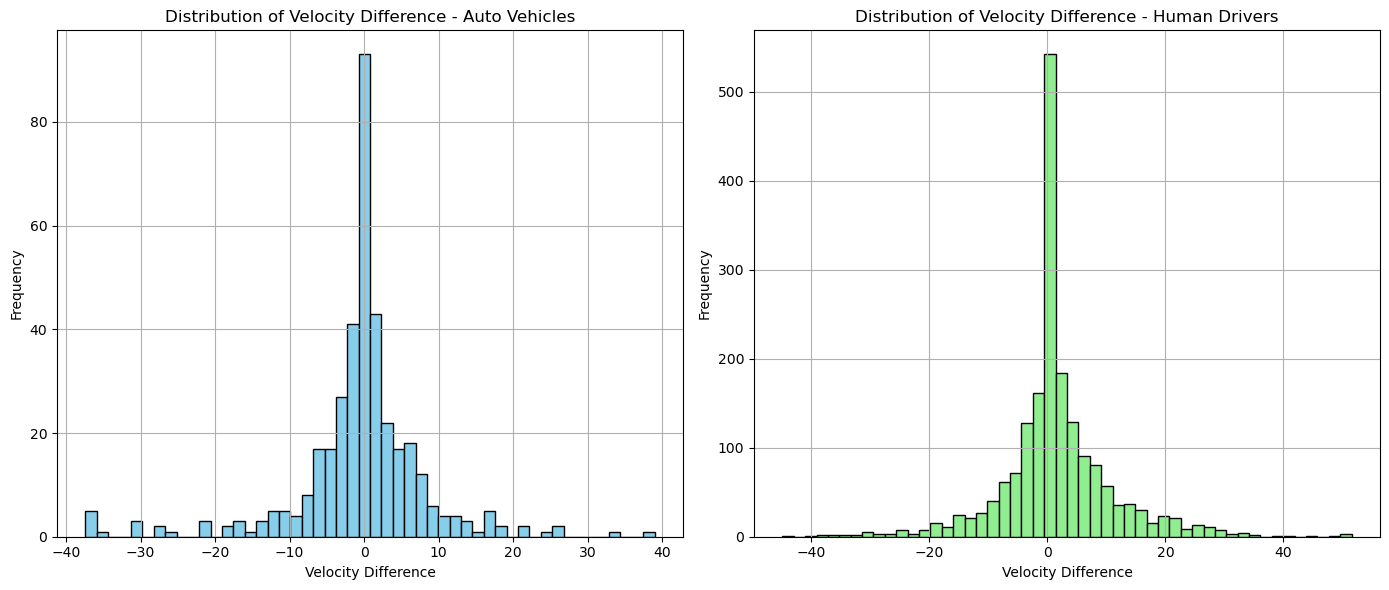

In [37]:
# compare the speed difference
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1) 
plt.hist(data_clean['vel_diff_following'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Velocity Difference - Auto Vehicles')
plt.xlabel('Velocity Difference')
plt.ylabel('Frequency')
plt.grid(True)

plt.subplot(1, 2, 2)  
plt.hist(human_data_clean['vel_diff_following'], bins=50, color='lightgreen', edgecolor='black')
plt.title('Distribution of Velocity Difference - Human Drivers')
plt.xlabel('Velocity Difference')
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()


plt.show()

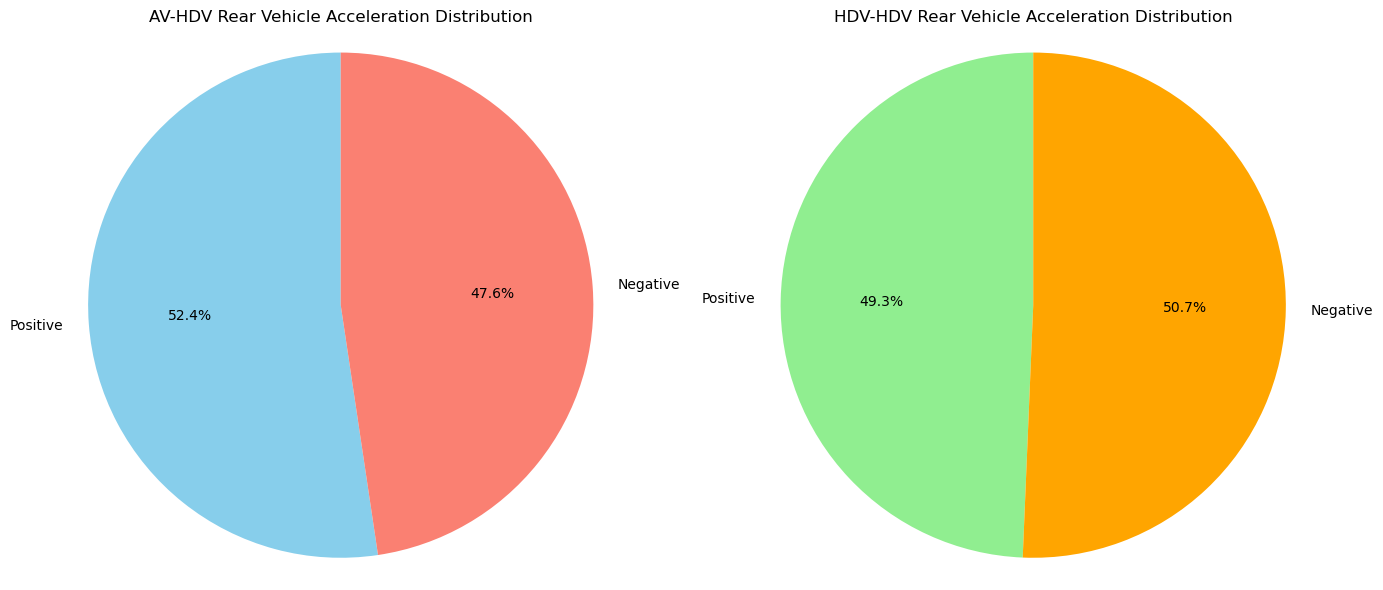

In [38]:
#compare the acceleration
# calculate the number of rear vehicle accelerations > 0 and < 0
auto_positive_acc = (data_clean['v_Acc'] > 0).sum()
auto_negative_acc = (data_clean['v_Acc'] < 0).sum()

human_positive_acc = (human_data_clean['v_Acc'] > 0).sum()
human_negative_acc = (human_data_clean['v_Acc'] < 0).sum()


plt.figure(figsize=(14, 6))


plt.subplot(1, 2, 1)
plt.pie([auto_positive_acc, auto_negative_acc], labels=['Positive', 'Negative'], 
        colors=['skyblue', 'salmon'], autopct='%1.1f%%', startangle=90)
plt.title('AV-HDV Rear Vehicle Acceleration Distribution')
plt.axis('equal')  

plt.subplot(1, 2, 2)
plt.pie([human_positive_acc, human_negative_acc], labels=['Positive', 'Negative'], 
        colors=['lightgreen', 'orange'], autopct='%1.1f%%', startangle=90)
plt.title('HDV-HDV Rear Vehicle Acceleration Distribution')
plt.axis('equal')  

plt.tight_layout()

plt.show()


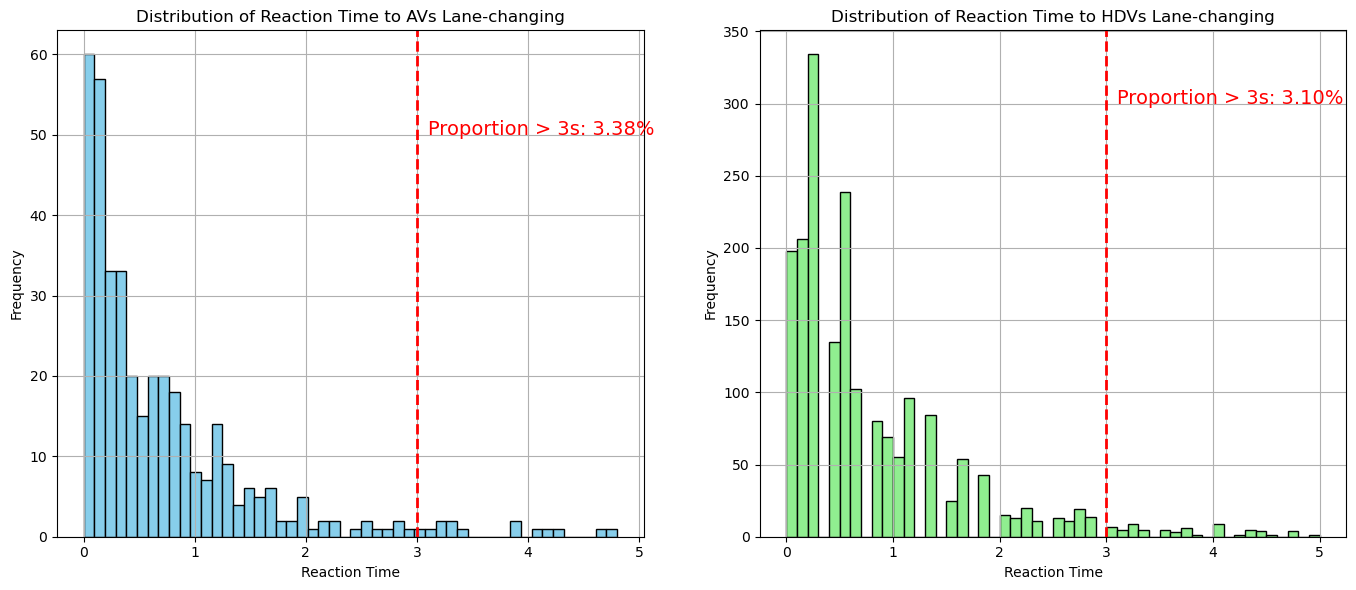

In [39]:
#compare reation time

# Calculate the proportion of reaction times greater than 3 seconds
auto_reaction_time_above_3 = (data_clean['reaction_time'] > 3).sum() / len(data_clean['reaction_time'])
human_reaction_time_above_3 = (human_data_clean['reaction_time'] > 3).sum() / len(human_data_clean['reaction_time'])


plt.figure(figsize=(14, 6))

# Reaction Time Distribution of Autonomous Vehicles
plt.subplot(1, 2, 1)
plt.hist(data_clean['reaction_time'], bins=50, color='skyblue', edgecolor='black')
plt.axvline(x=3, color='red', linestyle='dashed', linewidth=2)  # critical line
plt.title('Distribution of Reaction Time to AVs Lane-changing')
plt.xlabel('Reaction Time')
plt.ylabel('Frequency')
plt.grid(True)
plt.text(3.1, 50, f'Proportion > 3s: {auto_reaction_time_above_3:.2%}', color='red',  fontsize=14)

# Reaction Time Distribution of Human-Driven Vehicles
plt.subplot(1, 2, 2)
plt.hist(human_data_clean['reaction_time'], bins=50, color='lightgreen', edgecolor='black')
plt.axvline(x=3, color='red', linestyle='dashed', linewidth=2)  # critical line
plt.title('Distribution of Reaction Time to HDVs Lane-changing')
plt.xlabel('Reaction Time')
plt.ylabel('Frequency')
plt.grid(True)
plt.text(3.1, 300, f'Proportion > 3s: {human_reaction_time_above_3:.2%}', color='red', fontsize=14)

plt.tight_layout()

plt.show()


In [ ]:
# compare space headway
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1) 
plt.hist(data_clean['following_Space_Headway'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Space Headway - Auto Vehicles')
plt.xlabel('Space Headway')
plt.ylabel('Frequency')
plt.grid(True)

plt.subplot(1, 2, 2) 
plt.hist(human_data_clean['following_Space_Headway'], bins=50, color='lightgreen', edgecolor='black')
plt.title('Distribution of Space Headway - Human Drivers')
plt.xlabel('Space Headway')
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()

plt.show()

In [ ]:
# t-test in reaction time/speed difference/space headway (<0.05)
from scipy.stats import ttest_ind

reaction_time_ttest = ttest_ind(data_clean['reaction_time'], human_data_clean['reaction_time'])

vel_diff_ttest = ttest_ind(data_clean['vel_diff_following'], human_data_clean['vel_diff_following'])

following_space_ttest = ttest_ind(data_clean['following_Space_Headway'], human_data_clean['following_Space_Headway'])

print(f"Reaction Time T-test:\n P-value: {reaction_time_ttest.pvalue:.10f}")
print(f"Velocity Difference T-test:\n P-value: {vel_diff_ttest.pvalue:.10f}")
print(f"Following Space Headway T-test:\n P-value: {following_space_ttest.pvalue:.10f}")

In [ ]:
# space headway and speed difference
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1) 
plt.scatter(data_clean['following_Space_Headway'], data_clean['vel_diff_following'], alpha=0.5, color='orange')
plt.title('Space Headway vs Velocity Difference - Auto Vehicles')
plt.xlabel('Space Headway (meters)')
plt.ylabel('Velocity Difference (feet/second)')
plt.grid(True)

plt.subplot(1, 2, 2)  
plt.scatter(human_data_clean['following_Space_Headway'], human_data_clean['vel_diff_following'], alpha=0.5, color='lightcoral')
plt.title('Space Headway vs Velocity Difference - Human Drivers')
plt.xlabel('Space Headway (meters)')
plt.ylabel('Velocity Difference (feet/second)')
plt.grid(True)

plt.tight_layout()

plt.show()

In [ ]:
#space headway and acceleration
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1) 
data_clean['space_headway_category'] = pd.cut(data_clean['following_Space_Headway'], bins=[0, 50, 100, 200], labels=['0-50m', '50-100m', '100-200m'])
sns.boxplot(x='space_headway_category', y='following_v_Acc', data=data_clean, color='orange')
plt.title('Acceleration Distribution by Space Headway - AVs')
plt.xlabel('Space Headway Categories')
plt.ylabel('Following Vehicle Acceleration (m/s²)')
plt.grid(True)

plt.subplot(1, 2, 2)  
human_data_clean['space_headway_category'] = pd.cut(human_data_clean['following_Space_Headway'], bins=[0, 50, 100, 200], labels=['0-50m', '50-100m', '100-200m'])
sns.boxplot(x='space_headway_category', y='following_v_Acc', data=human_data_clean, color='lightcoral')
plt.title('Acceleration Distribution by Space Headway - HDVs')
plt.xlabel('Space Headway Categories')
plt.ylabel('Following Vehicle Acceleration (m/s²)')
plt.grid(True)

plt.tight_layout()

plt.show()

In [ ]:
#calculate TTC and Required Deceleration of HDV-HDV
human_data_clean['Time_To_Collision'] = np.where(
    #If vehicles approach
    human_data_clean['vel_diff_following'] < 0,  
    human_data_clean['following_Space_Headway'] / np.abs(human_data_clean['vel_diff_following']),  
    0  #If there is no risk of collision, then = 0
)
human_data_clean['Deceleration_Required'] = np.where(
    human_data_clean['vel_diff_following'] < 0, 
    ((human_data_clean['v_Vel'] - human_data_clean['following_v_Vel'])**2) / ((-2) * human_data_clean['following_Space_Headway']),
    0  
)
human_data_clean

In [ ]:
#calculate TTC and Required Deceleration of AV-HDV
data_clean['Time_To_Collision'] = np.where(
    data_clean['vel_diff_following'] < 0,  
    data_clean['following_Space_Headway'] / np.abs(data_clean['vel_diff_following']),  
    0  
)
data_clean['Deceleration_Required'] = np.where(
    data_clean['vel_diff_following'] < 0, 
    ((data_clean['v_Vel'] - data_clean['following_v_Vel'])**2) / ((-2) * data_clean['following_Space_Headway']),
    0 
)

data_clean

In [ ]:

# relationship between TTC and Required Deceleration
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].scatter(human_data_clean['Time_To_Collision'], human_data_clean['Deceleration_Required'], 
                 label='Human-Driven', color='blue', alpha=0.6)
axes[0].set_title('TTC vs. Required Deceleration for HDV-HDV')
axes[0].set_xlabel('Time to Collision (s)')
axes[0].set_ylabel('Required Deceleration (m/s²)')
axes[0].grid(True)
axes[0].legend()
axes[0].set_xlim(0, 2000) 
axes[0].set_ylim(-10, 0) 

axes[1].scatter(data_clean['Time_To_Collision'], data_clean['Deceleration_Required'], 
                 label='Autonomous', color='red', alpha=0.6)
axes[1].set_title('TTC vs. Required Deceleration for AV-HDV')
axes[1].set_xlabel('Time to Collision (s)')
axes[1].set_ylabel('Required Deceleration (m/s²)')
axes[1].grid(True)
axes[1].legend()
axes[1].set_xlim(0, 2000)  
axes[1].set_ylim(-10, 0)  

plt.tight_layout()
plt.show()

In [ ]:
# compare the data
human_ttc_mean = ((human_data_clean['Time_To_Collision'] > 0) & (human_data_clean['Time_To_Collision'] < 3)).sum() / len(human_data_clean)
auto_ttc_mean = ((data_clean['Time_To_Collision'] > 0) & (data_clean['Time_To_Collision'] < 3)).sum() / len(data_clean)


human_decel_mean = human_data_clean['Deceleration_Required'].mean()
human_decel_std = human_data_clean['Deceleration_Required'].std()

auto_decel_mean = data_clean['Deceleration_Required'].mean()
auto_decel_std = data_clean['Deceleration_Required'].std()

{
    'Human-Driven TTC < 3 Proportion': human_ttc_mean,
    'Autonomous TTC < 3 Proportion': auto_ttc_mean,
    'Human-Driven Deceleration Mean': human_decel_mean,
    'Human-Driven Deceleration Std': human_decel_std,
    'Autonomous Deceleration Mean': auto_decel_mean,
    'Autonomous Deceleration Std': auto_decel_std
}


In [ ]:

# calculate the data where the rear vehicle's acceleration is less than the required deceleration and RD<0
def calculate_risk_percentage_with_RD(df):
    df_filtered = df[df['Deceleration_Required'] < 0]
    risk_data = df_filtered[df_filtered['following_v_Acc'] > df_filtered['Deceleration_Required']]
    no_risk_data = df[(df['Deceleration_Required'] >= 0) | (df_filtered['following_v_Acc'] <= df_filtered['Deceleration_Required'])]
    risk_percentage = len(risk_data) / len(df) * 100
    no_risk_percentage = len(no_risk_data) / len(df) * 100
    
    return risk_percentage, no_risk_percentage, len(risk_data), len(no_risk_data), len(df_filtered)

# HDV-HDV
human_risk_percentage, human_no_risk_percentage, human_risk_count, human_no_risk_count, human_total_count = calculate_risk_percentage_with_RD(human_data_clean)

# AV-HDV
auto_risk_percentage, auto_no_risk_percentage, auto_risk_count, auto_no_risk_count, auto_total_count = calculate_risk_percentage_with_RD(data_clean)

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

ax[0].pie([human_risk_percentage, human_no_risk_percentage], 
          labels=['Risk', 'No Risk'], 
          autopct='%1.1f%%', 
          colors=['red', 'green'], 
          startangle=90)
ax[0].set_title('Collision Risk for HDVs in HDV-HDV')

ax[1].pie([auto_risk_percentage, auto_no_risk_percentage], 
          labels=['Risk', 'No Risk'], 
          autopct='%1.1f%%', 
          colors=['red', 'green'], 
          startangle=90)
ax[1].set_title('Collision Risk for AVs in AV-HDV')

plt.tight_layout()
plt.show()
# data detail
{
    'Human Driven Risk Percentage ': human_risk_percentage,
    'Human Driven No Risk Percentage ': human_no_risk_percentage,
    'Autonomous Risk Percentage ': auto_risk_percentage,
    'Autonomous No Risk Percentage ': auto_no_risk_percentage,
}
